In [14]:
import os 
import numpy as np 
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nutil.plot import paperStyle
import seaborn as sns



In [12]:
import shutil
def clean_folders(folder):
    history_path = "./history"
    #folder = "/kvasir/"
    for filename in os.listdir(history_path + folder ):
        if "_kvasir" in filename:
            new_filename = filename.replace("_kvasir", "")
            old_file_path = os.path.join(history_path+ folder, filename)
            new_file_path = os.path.join(history_path+ folder, new_filename)
            
            shutil.move(old_file_path, new_file_path)

In [13]:
folders_to_clean = ["/bagls/", "/heart/","/kvasir/", "/lung/", "/spleen/", "/colon/"]
for folder in folders_to_clean:
    #clean_folders(folder)
    pass

In [4]:
def plot_history_line(paths, title = None, legends_on=False, vertical = True, save_path = None):
    with paperStyle():
        colors = cm.rainbow(np.linspace(0, 1, len(paths)))
        if vertical == True: 
            fig, axes = plt.subplots(2, figsize=(3, 2))
        else: 
            fig, axes = plt.subplots(1, 2, figsize=(6, 2))

        handles, labels = [], []

        for path, color in zip(paths, colors):
            with open(os.path.join(path), 'r') as f:
                history = json.load(f)

            # Use the color from the colormap for each file
            plot0, = axes[0].plot(range(1,len(history['val_loss'])+1), history['val_loss'], color=color)
            plot1, = axes[1].plot(range(1,len(history['val_iou_score'])+1), history['val_iou_score'], color=color)

            if legends_on:
                parts = path.split("_")
                current_num_nests = int(parts[1])
                current_num_filters = int(parts[2])
                current_operation = parts[3]
                legend = f"n = {current_num_nests}, filters = {current_num_filters}"
                handles.append(plot0)
                labels.append(legend)

        if legends_on:
            fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

        if title is not None: 
            axes[0].set_title(f"Loss for {title}", fontsize=8)
            axes[1].set_title(f"IoU for {title}", fontsize=8)
        else: 
            axes[0].set_title('Loss for All History Files', fontsize=8)
            axes[1].set_title('IoU for All History Files', fontsize=8)
        
        axes[0].set_xlabel('Epochs', fontsize=8)
        axes[0].set_ylabel('Loss', fontsize=8)
        axes[1].set_xlabel('Epochs', fontsize=8)
        axes[1].set_ylabel('IoU', fontsize=8)
        axes[0].set_xlim([0, len(history['loss'])])
        axes[1].set_xlim([0, len(history['loss'])])
        sns.despine(trim=True, offset=5)
        
        plt.tight_layout()
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()

In [5]:
def plot_history_scatter(paths, title = None, legends_on=False, vertical = True, save_path = None):
    with paperStyle():
        colors = cm.rainbow(np.linspace(0, 1, len(paths)))
        if vertical == True: 
            fig, axes = plt.subplots(2, figsize=(3, 2))
        else: 
            fig, axes = plt.subplots(1, 2, figsize=(6, 2))

        handles, labels = [], []

        for path, color in zip(paths, colors):
            with open(os.path.join(path), 'r') as f:
                history = json.load(f)

            # Use the color from the colormap for each file
            scatter0 = axes[0].scatter(range(1,len(history['val_loss'])+1), history['val_loss'], color=color)
            scatter1 = axes[1].scatter(range(1,len(history['val_iou_score'])+1), history['val_iou_score'], color=color)

            if legends_on:
                parts = path.split("_")
                current_num_nests = int(parts[1])
                current_num_filters = int(parts[2])
                current_operation = parts[3]
                legend = f"n = {current_num_nests}, filters = {current_num_filters}"
                handles.append(scatter0)
                labels.append(legend)

        if legends_on:
            fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

        if title is not None: 
            axes[0].set_title(f"Loss for {title}", fontsize=8)
            axes[1].set_title(f"IoU for {title}", fontsize=8)
        else: 
            axes[0].set_title('Loss for All History Files', fontsize=8)
            axes[1].set_title('IoU for All History Files', fontsize=8)
        
        axes[0].set_xlabel('Epochs', fontsize=8)
        axes[0].set_ylabel('Loss', fontsize=8)
        axes[1].set_xlabel('Epochs', fontsize=8)
        axes[1].set_ylabel('IoU', fontsize=8)
        axes[0].set_xlim([0, len(history['loss'])])
        axes[1].set_xlim([0, len(history['loss'])])

        sns.despine(trim=True, offset=5)

        plt.tight_layout()
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()

In [2]:
def plot_history_line_op(paths, operations = ["add", "multiply", "concatenate"], metrics = ["val_loss", "val_iou_score"], title = None, legends_on=False, save_path = None, vertical = False):
    with paperStyle():
        nests = sorted(set([int(path.split("_")[1]) for path in paths]))
        colors = cm.rainbow(np.linspace(0, 1, len(nests)))

        if vertical == True: 
            fig, axes = plt.subplots(len(metrics)*len(operations), figsize=(18, 2))
        else: 
            fig, axes = plt.subplots(len(metrics), len(operations), figsize=(9, 6))  # Create a 2x3 grid of subplots

        lines = []  # List to store the Line2D objects for the legend
        added_nests = []  # List to store the nests that have been added to the legend

        for idx, path in enumerate(paths):
            with open(os.path.join(path), 'r') as f:
                history = json.load(f)

            parts = path.split("_")
            current_nest = int(parts[1])
            current_operation = parts[3].replace(".json", "")

            color_index = nests.index(current_nest)
            operation_index = operations.index(current_operation)

            line1, = axes[0, operation_index].plot(range(1, len(history['val_loss'])+1), history['val_loss'], color=colors[color_index])
            line2, = axes[1, operation_index].plot(range(1, len(history['iou_score'])+1), history['val_iou_score'], color=colors[color_index])

            for i, metric in enumerate(metrics):
                axes[i, operation_index].set_title(f"{metric.capitalize()} for {current_operation}", fontsize=8)
                axes[i, operation_index].set_xlabel('Epochs', fontsize=8)
                axes[i, operation_index].set_ylabel(metric.capitalize(), fontsize=8)
                axes[i, operation_index].set_xlim([1, len(history[metric])+1])

            # Adding the objects to the list for the legend
            if current_nest not in added_nests:
                lines.append(line1)
                added_nests.append(current_nest)

        if legends_on:
            #axes[0, 0].legend(lines, [f"Nests: {nest}" for nest in added_nests], loc='lower left')
            #fig.legend(lines, [f"Nests: {nest}" for nest in added_nests], loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
            for operation_index in range(len(operations)):
                axes[0, operation_index].legend(lines, [f"Nests: {nest}" for nest in added_nests], loc='lower left', fontsize='small')
                axes[1, operation_index].legend(lines, [f"Nests: {nest}" for nest in added_nests], loc='upper left', fontsize='small')

        if title is not None:
            fig.suptitle(f"{title}", fontsize=10)
        sns.despine(trim=True, offset=5)
        plt.tight_layout()
        if save_path is not None:
            print("Saving to ", save_path)  
            plt.savefig(save_path)
        #plt.show()

In [37]:
def plot_iou_line_op(paths, operations = ["add", "multiply", "concatenate"], title = None, legends_on=False, save_path = None):
    with paperStyle():
        nests = sorted(set([int(path.split("_")[1]) for path in paths]))
        filters = sorted(set([int(path.split("_")[2]) for path in paths]))
        colors = cm.rainbow(np.linspace(0, 1, len(nests)))

        fig, axes = plt.subplots(len(filters), len(operations), figsize=(9, 6))  

        lines = []  
        added_nests = []  

        for idx, path in enumerate(paths):
            with open(os.path.join(path), 'r') as f:
                history = json.load(f)

            parts = path.split("_")
            current_nest = int(parts[1])
            current_filters = int(parts[2])
            current_operation = parts[3].replace(".json", "")
            

            color_index = nests.index(current_nest)
            operation_index = operations.index(current_operation)
            filter_index = filters.index(current_filters)

            line, = axes[filter_index, operation_index].plot(range(1, len(history['val_iou_score'])+1), history['val_iou_score'], color=colors[color_index])

            axes[filter_index, operation_index].set_title(f"{current_operation.capitalize()} with {current_filters} filters", fontsize=8)
            axes[filter_index, operation_index].set_xlabel('Epochs', fontsize=8)
            axes[filter_index, operation_index].set_ylabel('IoU Score', fontsize=8)
            axes[filter_index, operation_index].set_xlim([1, len(history['val_iou_score'])+1])

            # Adding the objects to the list for the legend
            if current_nest not in added_nests:
                lines.append(line)
                added_nests.append(current_nest)

        if legends_on:
            for operation_index in range(len(operations)):
                for filter_index in range(len(filters)):
                    axes[filter_index, operation_index].legend(lines, [f"Nests: {nest}" for nest in added_nests], loc='lower right', fontsize='small')

        if title is not None:
            fig.suptitle(f"{title}", fontsize=10)
        sns.despine(trim=True, offset=5)
        plt.tight_layout()
        if save_path is not None:
            print("Saving to ", save_path)  
            plt.savefig(save_path)
        plt.show()

In [3]:
def filter_paths(paths, num_nests, num_filters, operation):
    filtered_paths = [path for path in paths if f"history_{num_nests}_{num_filters}_{operation}" in path]
    return filtered_paths

def paths_fixed_filters(paths, num_filters):
    filtered_paths = []
    for path in paths:
        parts = path.split("_")
        if int(parts[2]) == num_filters:
            filtered_paths.append(path)
    return filtered_paths

def paths_fixed_nests(paths, num_nests):
    filtered_paths = [path for path in paths if f"history_{num_nests}" in path]
    return filtered_paths

def paths_fixed_operation(paths, operation):
    filtered_paths = [path for path in paths if f"_{operation}" in path]
    return filtered_paths

In [38]:
def evaluate_best(paths):
    best_iou = float('-inf')
    model_best_iou = None
    best_loss = float('inf')
    model_best_loss = None

    for path in paths:
        with open(os.path.join(path), 'r') as f:
            history = json.load(f)
            
        if max(history['val_iou_score']) > best_iou:
            best_iou = max(history['val_iou_score'])
            model_best_iou = path
        if min(history['val_loss']) < best_loss:
            best_loss = min(history['val_loss'])
            model_best_loss = path

    print(f"The model with the highest IoU is: {model_best_iou} with a score of {best_iou}")
    print(f"The model with the lowest loss is: {model_best_loss} with a score of {best_loss}")

In [39]:
def evaluate_best_best(paths):
    best_score = float('-inf')
    model_best_score = None

    for path in paths:
        with open(os.path.join(path), 'r') as f:
            history = json.load(f)
            
        current_iou = max(history['val_iou_score'])
        current_loss = min(history['val_loss'])
        current_score = current_iou - current_loss
            
        if current_score > best_score:
            best_score = current_score
            model_best_score = path

    print(f"The model with the best score (IoU - loss) is: {model_best_score}")

In [ ]:
# folders = ["/bagls/", "/heart/","/kvasir/", "/lung/", "/spleen/"]
# for folder in folders:
    
#     history_path = "./history"
#     history_path += folder
#     paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]
#     print("\n"+folder.replace("/", ""))
#     evaluate_best(paths)
#     evaluate_best_best(paths)
    

In [ ]:
history_path = "./history"
image_path = "./images"
folder = "/lung/"
history_path += folder
image_path += folder
paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]

In [ ]:
dataset_name = folder.replace("/", "")
target_n_filters = 8
path_to_save_img = None#IMAGE_PATH+f"{dataset_name}_{target_n_filters}_filters.svg"
target_files = paths_fixed_filters(paths, num_filters= target_n_filters)
plot_history_line_op(target_files, title = f"Number of filters = {target_n_filters} ({dataset_name})", legends_on=True, vertical = False, save_path=path_to_save_img)



In [7]:
def test_all():
    folders = ["/bagls/", "/heart/","/kvasir/", "/lung/", "/spleen/", "/colon/"]
    filters = [8, 16]
    for folder in folders:
        image_path = "./images/"
        history_path = "./history"
        history_path += folder
        #image_path += folder
        paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]
        print("\n"+folder.replace("/", ""))
        evaluate_best(paths)
        dataset_name = folder.replace("/", "")
        image_format = "png" # "svg"
        evaluate_best_best(paths)
        # for target_n_filters in filters:
        #     path_to_save_img = image_path+f"{dataset_name}_{target_n_filters}_filters.{image_format}"
        #     target_files = paths_fixed_filters(paths, num_filters= target_n_filters)
        #     plot_history_line_op(target_files, title = f"Number of filters = {target_n_filters} ({dataset_name})", legends_on=True, vertical = False, save_path=path_to_save_img)

In [47]:
def evaluate_best_in_folders(folders):
    for folder in folders:
        history_path = "./history"
        history_path += folder
        paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]

        best_iou_8_filters = float('-inf')
        best_iou_16_filters = float('-inf')
        best_nest_8_filters = None
        best_nest_16_filters = None
        best_operation_8_filters = None
        best_operation_16_filters = None

        for path in paths:
            parts = path.split("_")
            current_nest = int(parts[1])
            current_filters = int(parts[2])
            current_operation = parts[3].replace(".json", "")

            with open(os.path.join(path), 'r') as f:
                history = json.load(f)
            current_iou = max(history['val_iou_score'])
            if current_nest !=1:
                if current_filters == 8 and current_iou > best_iou_8_filters:
                    best_iou_8_filters = current_iou
                    best_nest_8_filters = current_nest
                    best_operation_8_filters = current_operation
                elif current_filters == 16 and current_iou > best_iou_16_filters:
                    best_iou_16_filters = current_iou
                    best_nest_16_filters = current_nest
                    best_operation_16_filters = current_operation

        print(f"In folder {folder}:")
        print(f"The model with {best_nest_8_filters} nests and 8 filters and operation {best_operation_8_filters} has the highest IoU of: {best_iou_8_filters}")
        print(f"The model with {best_nest_16_filters} nests and 16 filters and operation {best_operation_16_filters} has the highest IoU of: {best_iou_16_filters}")

folders = ["/bagls/", "/heart/","/kvasir/", "/lung/", "/spleen/", "/colon/"]
evaluate_best_in_folders(folders)

In folder /bagls/:
The model with 4 nests and 8 filters and operation multiply has the highest IoU of: 0.8586937189102173
The model with 4 nests and 16 filters and operation add has the highest IoU of: 0.8594280481338501
In folder /heart/:
The model with 8 nests and 8 filters and operation add has the highest IoU of: 0.8724336624145508
The model with 4 nests and 16 filters and operation multiply has the highest IoU of: 0.879676342010498
In folder /kvasir/:
The model with 4 nests and 8 filters and operation multiply has the highest IoU of: 0.5649675726890564
The model with 8 nests and 16 filters and operation multiply has the highest IoU of: 0.6120371222496033
In folder /lung/:
The model with 4 nests and 8 filters and operation add has the highest IoU of: 0.7443540692329407
The model with 4 nests and 16 filters and operation concatenate has the highest IoU of: 0.7652343511581421
In folder /spleen/:
The model with 8 nests and 8 filters and operation concatenate has the highest IoU of: 0.

In folder /bagls/:
The model with 1 nest and 8 filters has the highest IoU of: 0.8509204387664795 and the lowest loss of: 0.08072529733181
The model with 1 nest and 16 filters has the highest IoU of: 0.8574909567832947 and the lowest loss of: 0.07683786749839783
In folder /heart/:
The model with 1 nest and 8 filters has the highest IoU of: 0.8704035878181458 and the lowest loss of: 0.06935860961675644
The model with 1 nest and 16 filters has the highest IoU of: 0.8735324144363403 and the lowest loss of: 0.0675632655620575
In folder /kvasir/:
The model with 1 nest and 8 filters has the highest IoU of: 0.542760968208313 and the lowest loss of: 0.29911941289901733
The model with 1 nest and 16 filters has the highest IoU of: 0.5835683345794678 and the lowest loss of: 0.26534852385520935
In folder /lung/:
The model with 1 nest and 8 filters has the highest IoU of: 0.7342156171798706 and the lowest loss of: 0.15456297993659973
The model with 1 nest and 16 filters has the highest IoU of: 0.75

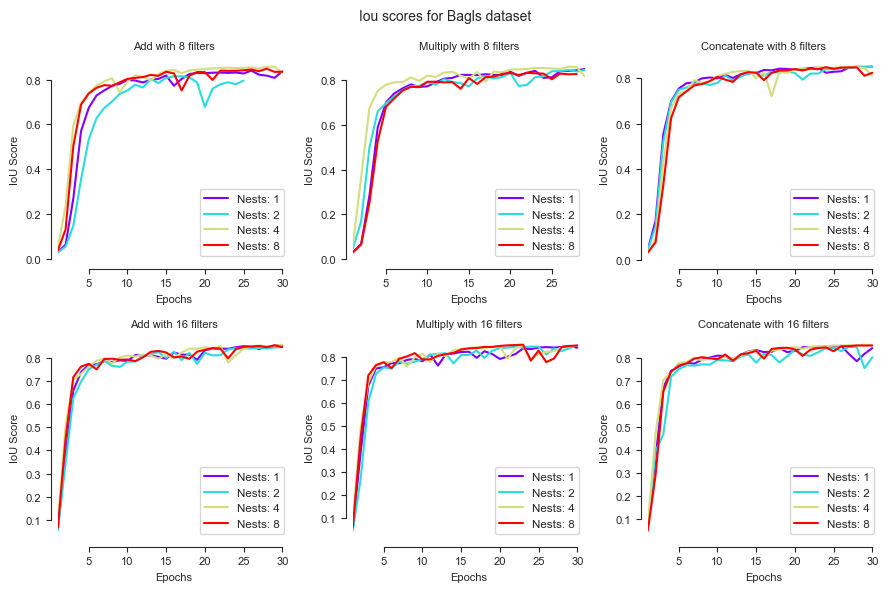


heart
The model with the highest IoU is: ./history/heart/history_4_16_multiply.json with a score of 0.879676342010498
The model with the lowest loss is: ./history/heart/history_4_16_multiply.json with a score of 0.06405908614397049
The model with the best score (IoU - loss) is: ./history/heart/history_4_16_multiply.json
Saving to  ./images/heart_iou.svg


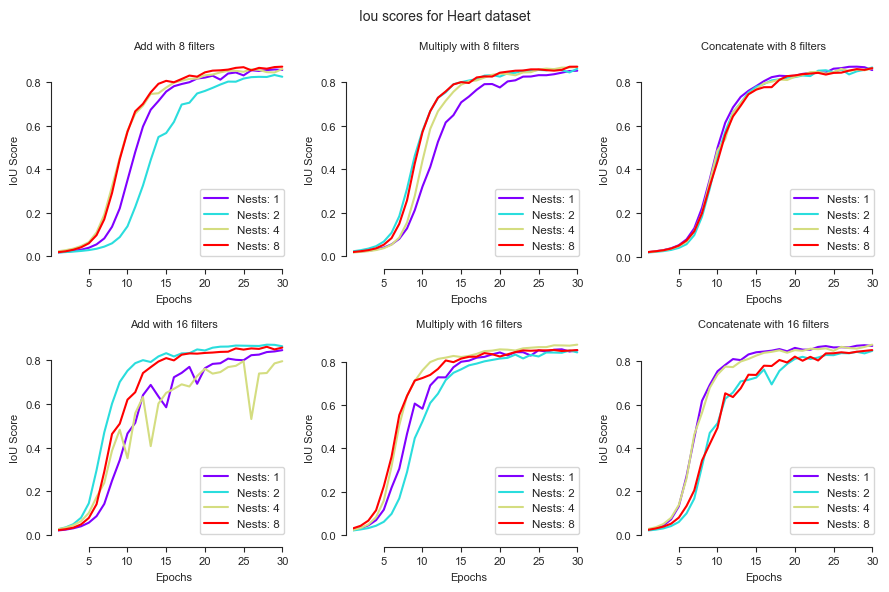


kvasir
The model with the highest IoU is: ./history/kvasir/history_8_16_multiply.json with a score of 0.6120371222496033
The model with the lowest loss is: ./history/kvasir/history_8_16_multiply.json with a score of 0.24236448109149933
The model with the best score (IoU - loss) is: ./history/kvasir/history_8_16_multiply.json
Saving to  ./images/kvasir_iou.svg


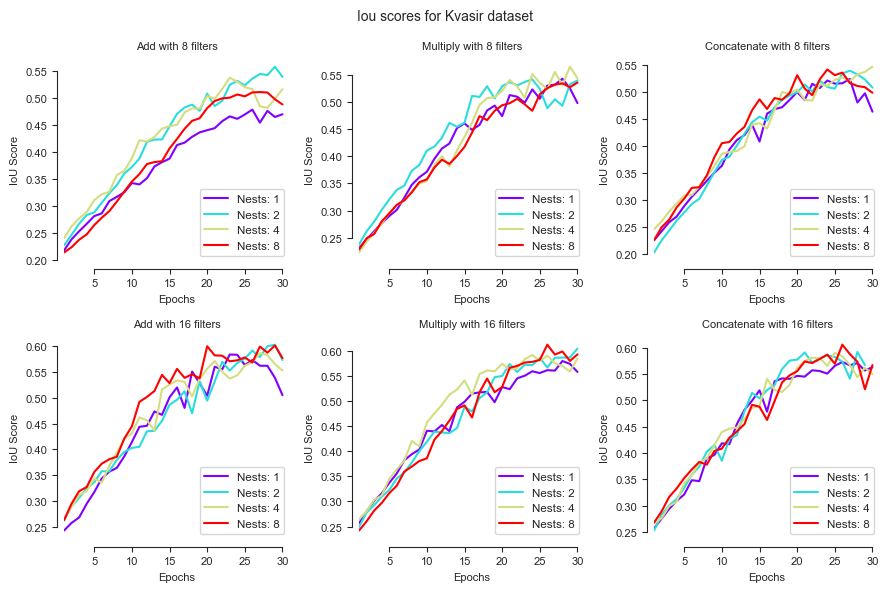


lung
The model with the highest IoU is: ./history/lung/history_4_16_concatenate.json with a score of 0.7652343511581421
The model with the lowest loss is: ./history/lung/history_4_16_concatenate.json with a score of 0.13382551074028015
The model with the best score (IoU - loss) is: ./history/lung/history_4_16_concatenate.json
Saving to  ./images/lung_iou.svg


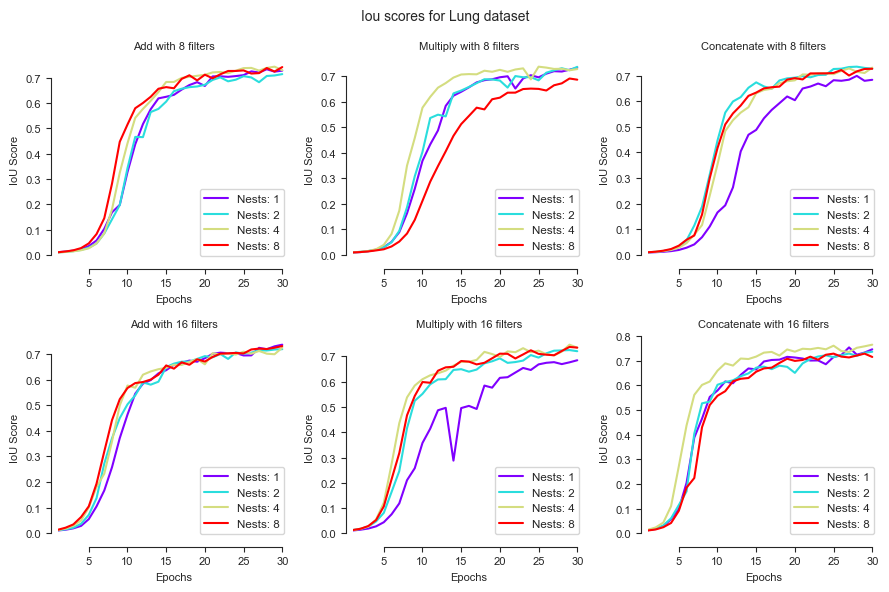


spleen
The model with the highest IoU is: ./history/spleen/history_8_16_concatenate.json with a score of 0.9200835824012756
The model with the lowest loss is: ./history/spleen/history_8_16_concatenate.json with a score of 0.041652899235486984
The model with the best score (IoU - loss) is: ./history/spleen/history_8_16_concatenate.json
Saving to  ./images/spleen_iou.svg


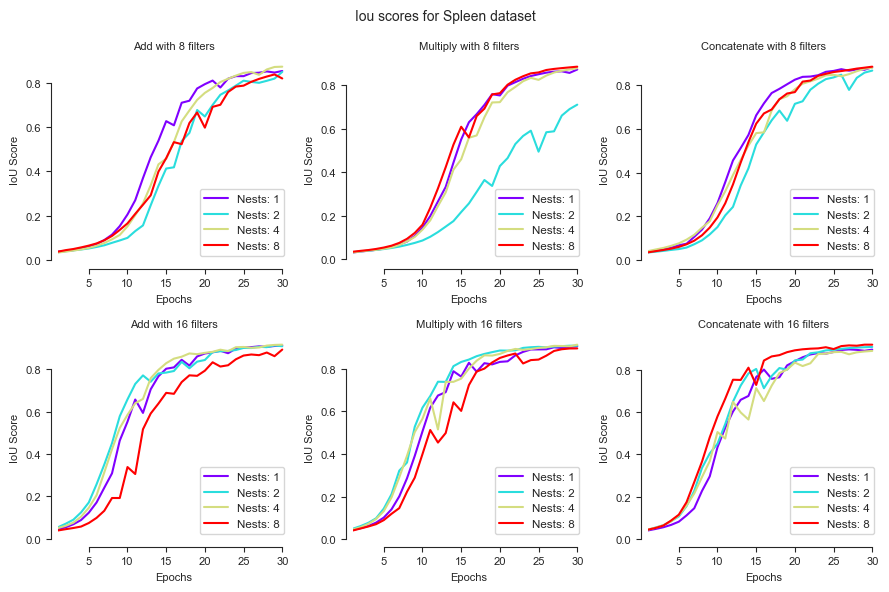


colon
The model with the highest IoU is: ./history/colon/history_1_16_multiply.json with a score of 0.6078733801841736
The model with the lowest loss is: ./history/colon/history_1_16_multiply.json with a score of 0.2447134256362915
The model with the best score (IoU - loss) is: ./history/colon/history_1_16_multiply.json
Saving to  ./images/colon_iou.svg


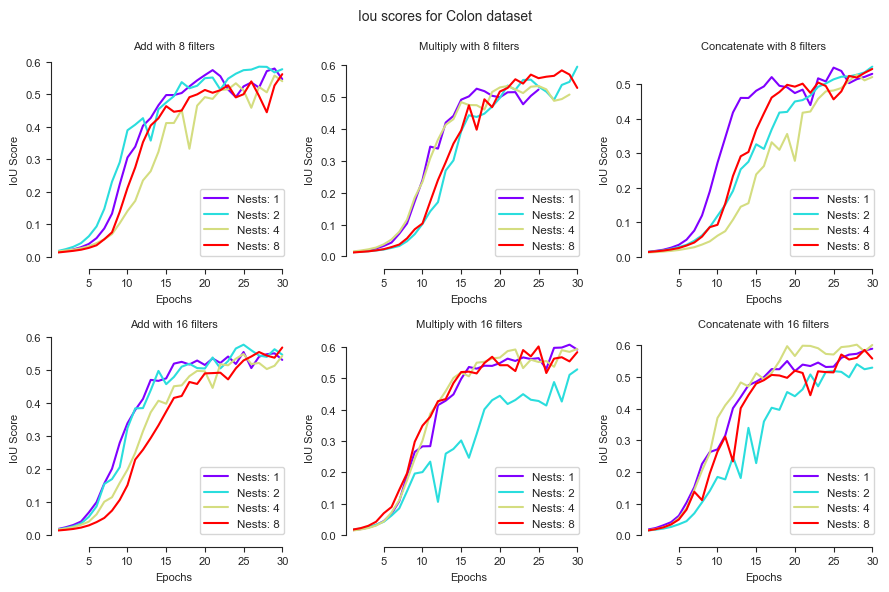

In [43]:
def plot_iou():
    folders = ["/bagls/", "/heart/","/kvasir/", "/lung/", "/spleen/", "/colon/"]
    evaluate_best_in_folders(folders)
    # for folder in folders:
    #     image_path = "./images/"
    #     history_path = "./history"
    #     history_path += folder
    #     paths = [os.path.join(history_path, path) for path in os.listdir(history_path)]
    #     print("\n"+folder.replace("/", ""))
    #     dataset_name = folder.replace("/", "")
    #     image_format = "svg" # "svg" "png"
    #     evaluate_best(paths)
    #     evaluate_best_best(paths)
    #     plot_iou_line_op(paths, operations = ["add", "multiply", "concatenate"], title = f"Iou scores for {dataset_name.capitalize()} dataset", legends_on=True, save_path=image_path+f"{dataset_name}_iou.{image_format}")
plot_iou()      